In [1]:
import numpy as np
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import spacy
from spacy.lang.es import Spanish
from sklearn.decomposition import LatentDirichletAllocation

**Carga de datos**

In [2]:
raw_jobs_SoftwareDev = open('../raw_data/Data_Jobs_SoftwareDeveloper.txt',encoding='utf-8').read()
raw_jobs_NetworkEng = open('../raw_data/Data_Jobs_NetworkEngineer.txt',encoding='utf-8').read()
raw_jobs_IADev= open('../raw_data/Data_Jobs_IADeveloper.txt',encoding='utf-8').read()

In [3]:
raw_jobs_SoftwareDev

'Jobs 1: Desarrollador de Software Junior - Aplicaciones Móviles\n\nAcerca del empleo: Buscamos un Desarrollador de Software Junior para unirse a nuestro equipo y contribuir al desarrollo de aplicaciones móviles innovadoras. Esta posición ofrece la oportunidad de trabajar en un entorno colaborativo y aprender de profesionales experimentados en el campo.\n\nResponsabilidades:\n\nColaborar en el diseño, desarrollo y prueba de aplicaciones móviles.\nContribuir al mantenimiento y mejora continua de las aplicaciones existentes.\nParticipar en reuniones de equipo y compartir ideas para optimizar procesos de desarrollo.\nCualificación:\n\nLicenciatura en Informática, Ingeniería de Software o campo relacionado.\nExperiencia mínima de 1 año en desarrollo de aplicaciones móviles (iOS/Android).\nConocimientos básicos de lenguajes de programación como Java, Kotlin, Swift o Flutter.\nLo que ofrecemos:\n\nOportunidad de crecimiento profesional y desarrollo de habilidades.\nAmbiente de trabajo colabo

In [4]:
raw_jobs_NetworkEng

'Jobs 1: Ingeniero de Redes Senior\nAcerca del Empleo:\nEstamos buscando un Ingeniero de Redes Senior para unirse a nuestro equipo dinámico. En este papel, serás responsable de diseñar, implementar y mantener nuestra infraestructura de red para garantizar la conectividad y la seguridad de nuestros sistemas.\n\nResponsabilidades:\n\nDiseñar y configurar redes LAN/WAN para garantizar un rendimiento óptimo.\nImplementar medidas de seguridad de red, como firewalls y sistemas de detección de intrusiones.\nColaborar con otros equipos para resolver problemas de red y optimizar el rendimiento.\nRealizar pruebas de rendimiento y diagnóstico para identificar y resolver problemas de red.\nMantener la documentación técnica actualizada sobre la infraestructura de red.\nCualificaciones:\n\nLicenciatura en Ingeniería Informática, Telecomunicaciones o campo relacionado.\nExperiencia previa en la configuración y administración de dispositivos de red (switches, routers, firewalls).\nConocimiento sólido 

In [5]:
raw_jobs_IADev

'Jobs 1: Científico de Datos Senior\nAcerca del empleo: Únete a nuestro equipo como Científico de Datos Senior y lidera proyectos de análisis de datos de vanguardia para impulsar la innovación y la toma de decisiones estratégicas.\n\nResponsabilidades:\n\nLiderar la investigación y el desarrollo de modelos de machine learning y análisis predictivo para optimizar operaciones y generar insights.\nColaborar con equipos interdisciplinarios para identificar oportunidades de mejora y optimización utilizando datos.\nGuiar y mentorizar a analistas de datos junior en técnicas y mejores prácticas de análisis.\nCualificación:\n\nMaestría en Ciencia de Datos, Estadística, Matemáticas o campo relacionado.\nMás de 5 años de experiencia en análisis de datos, preferiblemente en entornos empresariales.\nExperiencia demostrada en Python, R y SQL para análisis de datos y modelado predictivo.\nHabilidades sólidas de comunicación y capacidad para presentar resultados de manera efectiva a partes interesadas

**Tokenizamos**

In [6]:
stop_words = set(stopwords.words('spanish'))

In [7]:
def tokenize_words(text):
    # Separamos en palabras eliminando caracteres especiales
    words_split = re.split(r'\W+', text)
    # Convertimos palabras a minúscula
    words_split = [word.lower() for word in words_split]
    # Eliminar caracteres alfanumericos
    words_split = [word for word in words_split if word.isalpha()]
    # Eliminamos las stopwords del español (las palabras en ingles no hacemos nada)
    words_split = [word for word in words_split if not word in stop_words]

    return words_split

In [8]:
jobs_SoftwareDev_clean = tokenize_words(raw_jobs_SoftwareDev)
jobs_NetworkEng_clean = tokenize_words(raw_jobs_NetworkEng)
jobs_IADev_clean = tokenize_words(raw_jobs_IADev)

**Conteo de palabras**

In [13]:
def count_freq_tokens(jobs_tokens_clean):
    vectorizer = TfidfVectorizer()
    vectorizer.fit_transform(jobs_tokens_clean).toarray()
    return vectorizer

In [14]:
vectorizer_SoftwareDev = count_freq_tokens(jobs_SoftwareDev_clean)
vectorizer_NetworkEng = count_freq_tokens(jobs_NetworkEng_clean)
vectorizer_IADev = count_freq_tokens(jobs_IADev_clean)

In [15]:
# Ordenamos los diccionarios en orden descendente
def sorted_dict(vectorizer):
    keys = list(vectorizer.vocabulary_.keys())
    values = list(vectorizer.vocabulary_.values())

    merged = list(zip(keys, values))
    sorted_list = sorted(merged, key=lambda x: x[1], reverse=True)

    # Eliminar tokens con menos de 5 frecuencia por palabra
    #sorted_list = [word for word in sorted_list if word[1] > 5]
    return sorted_list

In [16]:
sorted_SoftwareDev = sorted_dict(vectorizer_SoftwareDev)
sorted_NetworkEng = sorted_dict(vectorizer_NetworkEng)
sorted_IADev = sorted_dict(vectorizer_IADev)

In [19]:
print('Longitud de token en jobs Software Developer:',len(sorted_SoftwareDev))
print('Longitud de token en jobs Network Developer:',len(sorted_NetworkEng))
print('Longitud de token en jobs IA Developer:',len(sorted_IADev))

Longitud de token en jobs Software Developer: 293
Longitud de token en jobs Network Developer: 188
Longitud de token en jobs IA Developer: 326


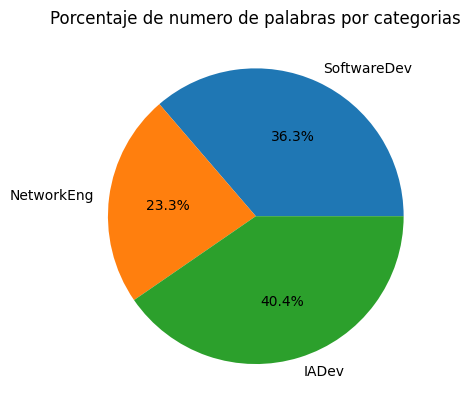

In [18]:
# Graficar porcentaje de tokens por categoria de Jobs
plt.pie([len(sorted_SoftwareDev),len(sorted_NetworkEng),len(sorted_IADev)], 
        labels=['SoftwareDev','NetworkEng','IADev'], autopct='%1.1f%%')
plt.title('Porcentaje de numero de palabras por categorias')
plt.show()

Obervamos que las ofertas relacionadas con IA tienen una mayor frecuencua de tokens, le sigue sofware developer.

EL corpus se inclanará mas hacia las ofertas de tipo IA y Software.

**Graficar frecuencias**

In [20]:
def plot_lines_cvs(cvs, num_terms):
    # Extraccion de terminos y frecuencias
    terms = [item[0] for item in cvs]
    freq = [item[1] for item in cvs]

    # Extraemos n numeros de terminos
    terms = terms[:num_terms]
    freq = freq[:num_terms]

    # Pintar grafico
    plt.figure(figsize=(20, 10))
    plt.plot(terms, freq, marker='o', linestyle='-')
    plt.title('Frecuencia de términos')
    plt.xlabel('Términos')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=80)
    plt.grid(True)
    plt.show()

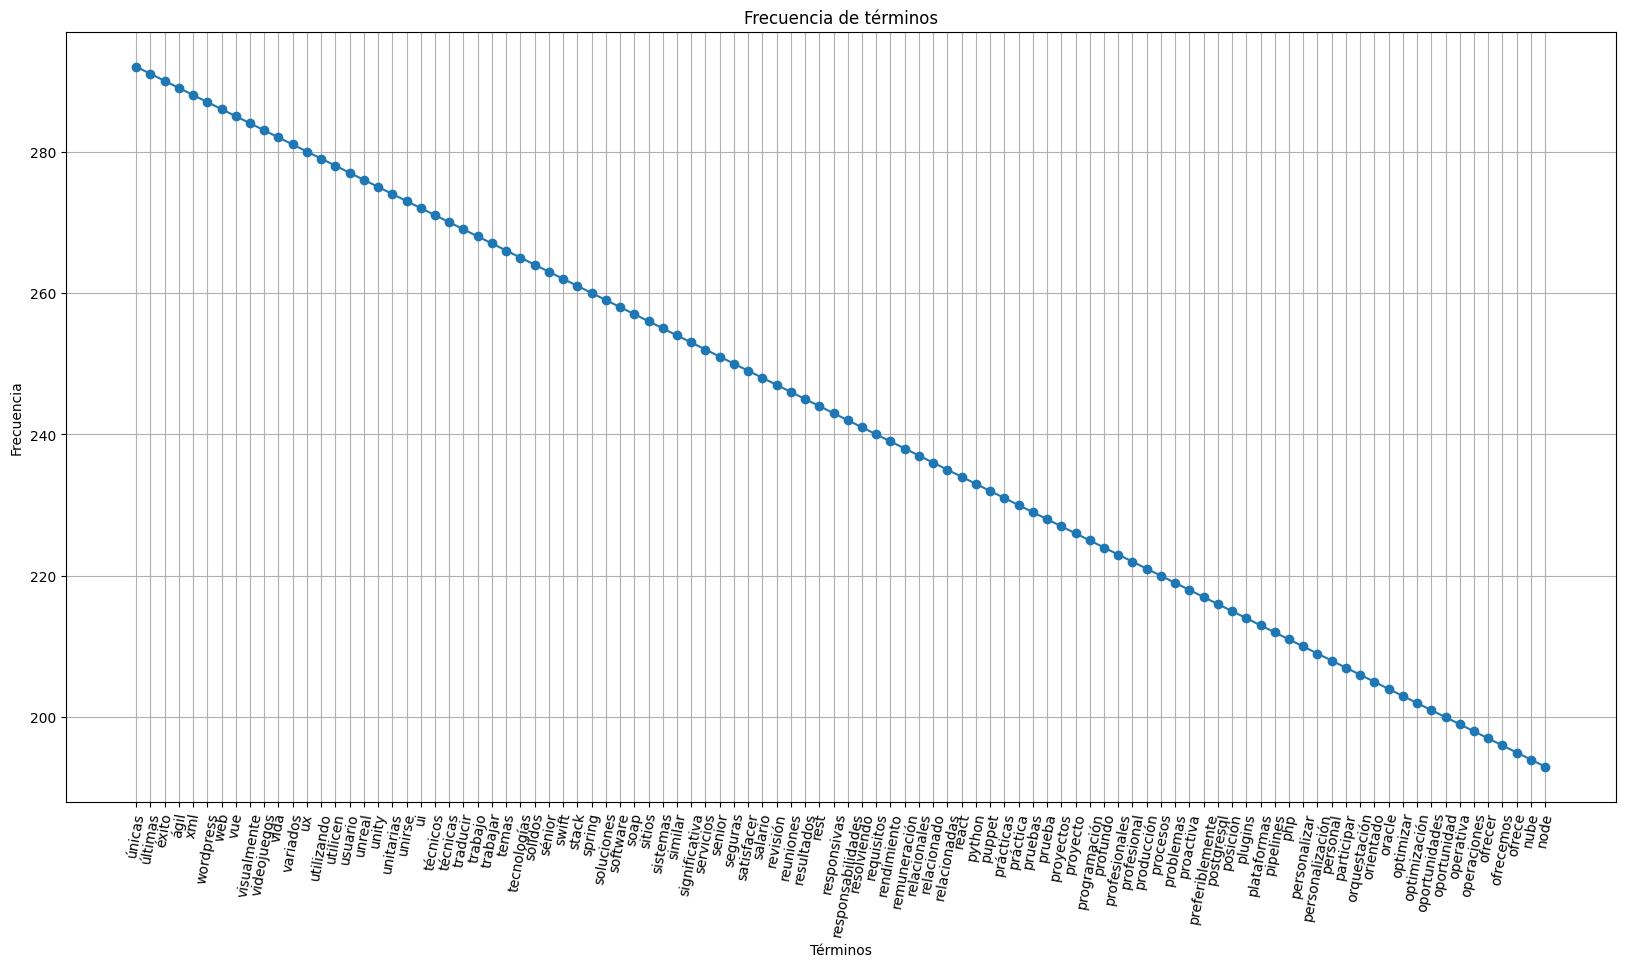

In [21]:
plot_lines_cvs(sorted_SoftwareDev, num_terms=100)

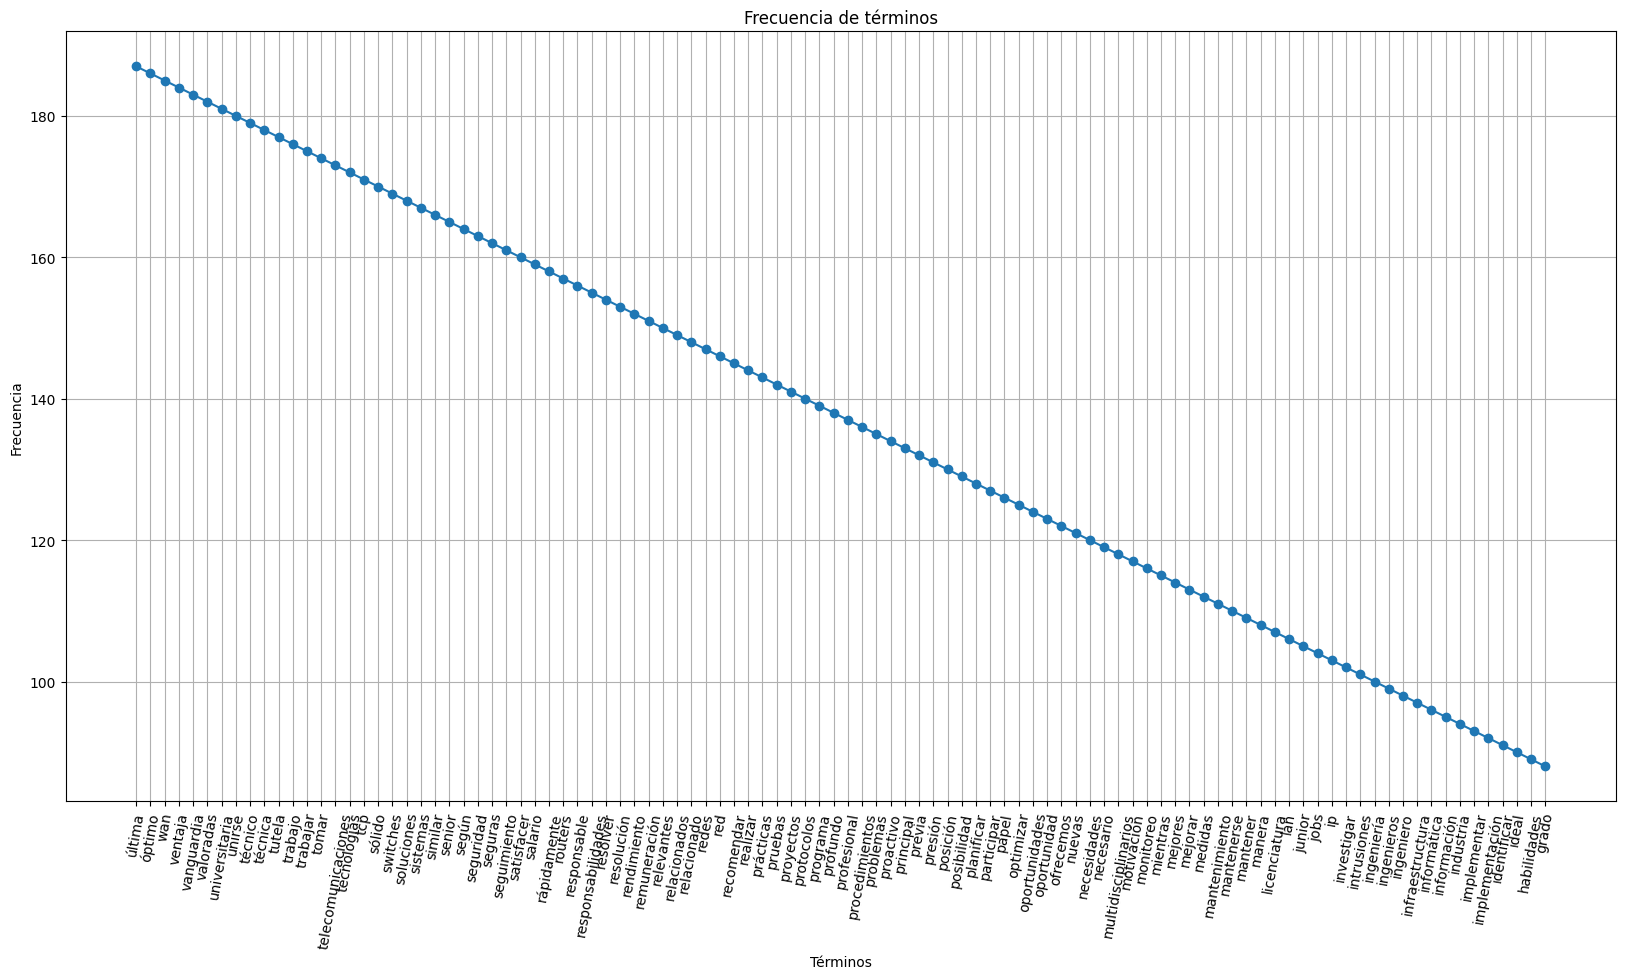

In [22]:
plot_lines_cvs(sorted_NetworkEng, num_terms=100)

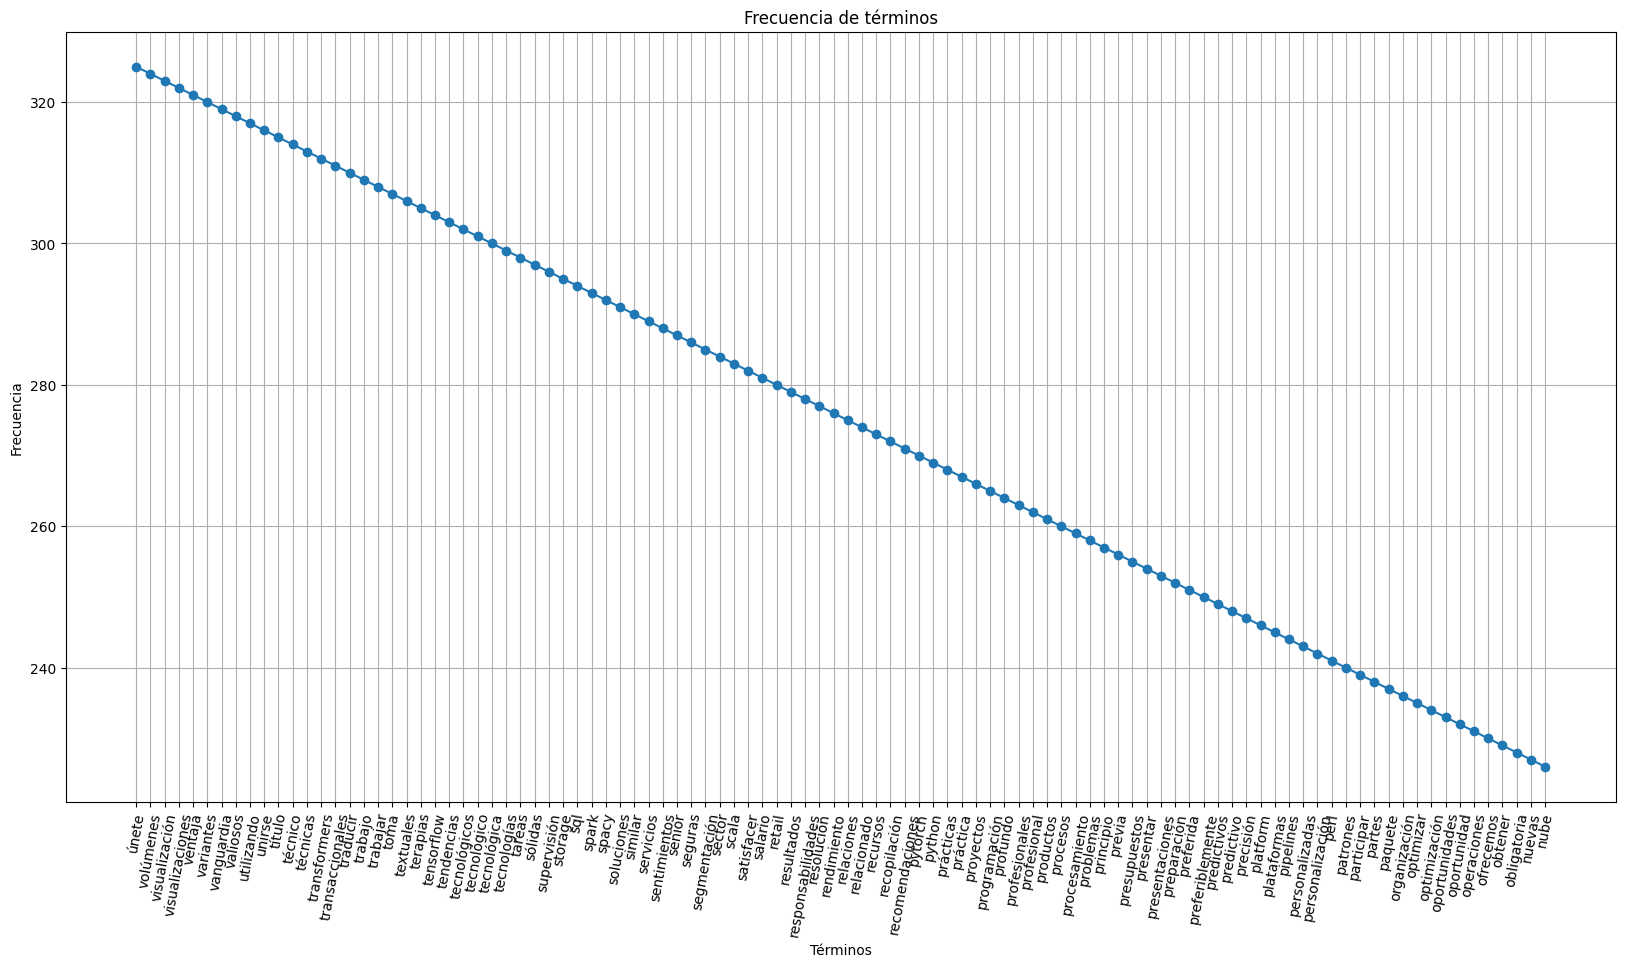

In [23]:
plot_lines_cvs(sorted_IADev, num_terms=100)

Observamos como para cada tipo de ofertas, encontramos palabras claves tipicas de las mismas.

Algunas palabras se repiten en ambos tipos, sobretodo referente a lo que la empresa ofrece y softkill buscado.

**Modelado de temas**

In [24]:
# lematizacion de tokens
nlp = spacy.load("es_core_news_sm")

# Cargamos el lemmatizer en español
def lemmatize_words(list_words):
    lemmatized_tokens = []
    # Recorremos la lista, convertimos a nlp y estraemos la posicion del texto con el lemma_ asociado
    for word in list_words:
        doc = nlp(word[0])
        for token in doc:
            lemmatized_tokens.append(token.lemma_)
    return lemmatized_tokens

In [25]:
lemma_SoftwareDev=lemmatize_words(sorted_SoftwareDev)
lemma_NetworkEng=lemmatize_words(sorted_NetworkEng)
lemma_IADev=lemmatize_words(sorted_IADev)

In [26]:
# Bags of Words, para matriz de datos
def BoW(data):
    c_vect = TfidfVectorizer(max_features=10000)
    text = c_vect.fit_transform(data)
    terms = c_vect.get_feature_names_out()
    return terms, text

In [27]:
terms_Soft, text_Soft =BoW(lemma_SoftwareDev)
terms_Net, text_Net =BoW(lemma_NetworkEng)
terms_IA, text_IA =BoW(lemma_IADev)

In [30]:
# Calculo LDA, ajustamos parametros con terminos y textos dados arriba (segun categoria deseada)
def LDA(terms, text):
    n_topics = 5
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10, learning_method='online',
                                    learning_offset=50, random_state=0, n_jobs=-1)

    document_topic = lda.fit_transform(text)
    topic_term = lda.components_
    return topic_term, terms

In [31]:
# Estudio del modelo
def topic_relevant_words(model, terms, topic_id, num_words):
    print('Grupo:',topic_id)
    print('----------------------------')
    # Estrae las posiciones de los mayores scores
    top_term_ids = model[topic_id,:].argsort()[:-num_words-1:-1]
    # Extrae los terminos de las posiciones correspondientes
    top_terms = [terms[id_term] for id_term in top_term_ids]
    # Extrae y calcula las probabilidades
    top_probabilities = model[topic_id, top_term_ids] / np.sum(model[topic_id,:])
    #Imprime el resultado
    for term, probabilities in zip(top_terms, top_probabilities):
        print("{:s}:      \t{:.4f}".format(term, probabilities))
    print('-----------------------------------\n')

In [57]:
topic_term, terms=LDA(terms_IA, text_IA)
topic_relevant_words(topic_term, terms, 4, 10)

Grupo: 4
----------------------------
cliente:      	0.0113
genético:      	0.0110
conocimiento:      	0.0108
azurar:      	0.0108
ambiente:      	0.0108
colaborar:      	0.0108
campaña:      	0.0107
accionabl:      	0.0107
comercial:      	0.0107
blast:      	0.0107
-----------------------------------



*Observaciones de los 5 topicos por tipos de ofertas*

1. SoftwareDev:
    - Grupo 1. Aspectos generales relacionados con la administración, la seguridad empresarial y el trabajo en equipo.
    - Grupo 2. Automatización, aprendizaje, desarrollo de aplicaciones para Android y maximización de beneficios.
    - Grupo 3. Arquitectura de software, desarrollo de aplicaciones, conocimientos especializados y colaboración en proyectos relacionados con tecnologías específicas como Angular.
    - Grupo 4. Experiencia laboral, aplicaciones informáticas, automatización de tareas mediante herramientas.
    - Grupo 5. Desarrollo de software, automatización de procesos, competitividad en el mercado de trabajo y tecnologías de backend.

2. NetworkEng:
    - Grupo 1. Desarrollo de habilidades básicas, actualización de conocimientos y desarrollo profesional.
    - Grupo 2. Desarrollo profesional, adaptación al cambio y competitividad en entornos conectados.
    - Grupo 3. Certificaciones profesionales, habilidades de comunicación, ambiente colaborativo y aprendizaje continuo.
    - Grupo 4. Desarrollo continuo, análisis de datos, detección de problemas, configuración de sistemas y desarrollo de la carrera profesional.
    - Grupo 5. Colaboración en equipo, soporte técnico, administración de sistemas, configuración de redes y cualificaciones profesionales.

3. IADev:
    - Grupo 1. Este grupo parece estar relacionado con aspectos generales de trabajo en equipo y aplicación de técnicas de inteligencia artificial, incluyendo visualización de datos y aprendizaje automático.
    - Grupo 2. Este grupo parece centrarse en aspectos más técnicos y estratégicos de la ciencia de datos aplicada a la inteligencia artificial, incluyendo análisis predictivo y distribuido.
    - Grupo 3. Este grupo parece estar relacionado con el desarrollo avanzado y la implementación de infraestructuras para aplicaciones de inteligencia artificial, incluyendo colaboración entre científicos de datos y analistas.
    - Grupo 4. Este grupo podría estar relacionado con aspectos fundamentales y aplicaciones específicas de la inteligencia artificial en campos como la medicina y la biomedicina, incluyendo liderazgo en el desarrollo de algoritmos y análisis de datos biomédicos.
    - Grupo 5. Este grupo parece centrarse en aplicaciones específicas de la inteligencia artificial, como la genética y la colaboración en entornos de desarrollo de software y análisis de datos.